# eBike Use Patterns: Summary
### by Cyrus Anderson

## Dataset Overview and Executive Summary

The Ford GoBike dataset contains >183,000 entries including information about ride start and end times, ride duration, rider gender and age, ride start and end location, and member status.

This analysis focuses on ride duration, ride start time, and rider gender to identify patterns in GoBike use. Key questions are: how long is the typical GoBike ride? When are the peak times for GoBikes use? Do different genders use GoBikes differently?

Key insights gained from this data set include:

*   GoBikes are used primarily for short trips (8-10 minutes)
*   Although Males make up a larger proportion of users, ride duration and weekly use patterns are similar for all genders
*   Peak weekday use coincides with typical business commute times
*   Weekend use is less than weekday use
*   Weekend use peaks mid-day and ride duration is slightly longer than weekdays

In [1]:
# Import all packages and embed plots inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Suppress warnings from final output
#import warnings
#warnings.simplefilter("ignore")

In [2]:
# Load the clean dataset into a pandas dataframe
expl_plot_df = pd.read_csv('expl_plot_df.csv')

# Set categories for Day of Week, Gender, and Weekday vs Weekend
lstdow = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
catdow = pd.CategoricalDtype(ordered = True, categories = lstdow)
expl_plot_df['day_of_week'] = expl_plot_df['day_of_week'].astype(catdow)

lstg = ['Male', 'Female', 'Other']
catg = pd.CategoricalDtype(ordered = True, categories = lstg)
expl_plot_df['member_gender'] = expl_plot_df['member_gender'].astype(catg)

lst = ['Weekday', 'Weekend']
wd_we_cat = pd.CategoricalDtype(ordered = True, categories = lst)
expl_plot_df['weekday_or_weekend'] = expl_plot_df['weekday_or_weekend'].astype(wd_we_cat)

# Confirm Dtypes
expl_plot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174875 entries, 0 to 174874
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   day_of_week         174875 non-null  category
 1   time_str            174875 non-null  object  
 2   duration_sec        174875 non-null  int64   
 3   member_age          174875 non-null  int64   
 4   member_gender       174875 non-null  category
 5   interval            174875 non-null  int64   
 6   ride_duration       174875 non-null  object  
 7   age_category        174875 non-null  object  
 8   weekday_or_weekend  174875 non-null  category
dtypes: category(3), int64(3), object(3)
memory usage: 8.5+ MB


## Ride Duration by Gender Type

***How long is the typical GoBike ride? Do different genders ride for different durations?***

*   The median ride duration for Males (8.2 minutes) is slightly less than that for Females (9.5 minutes) and Other (9.3 minutes)
*   The interquartile ranges for all genders have substantial overlap
*   Ride duration for all genders are not substantially different 

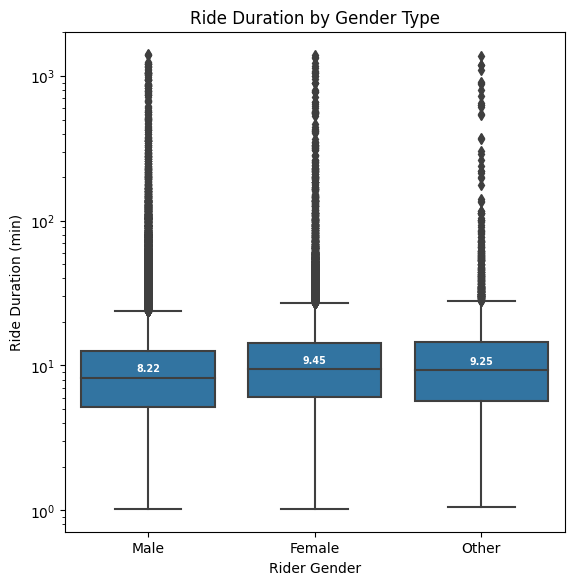

In [3]:
# Calculate ride duration in minutes
expl_plot_df['duration_min'] = expl_plot_df['duration_sec'] / 60
expl_plot_df['duration_min'] = expl_plot_df['duration_min'].round(decimals = 2)

# Generate boxplot of ride duration vs gender type
fig = plt.figure(figsize = (5, 5))
ax = fig.add_axes((1, 1, 1, 1));
ax = sns.boxplot(data = expl_plot_df, x = 'member_gender', y = 'duration_min', color = 'tab:blue')
ax.set_yscale('log')

# Label median values in minutes by adapting the method described here: https://stackoverflow.com/questions/38649501/labeling-boxplot-in-seaborn-with-median-value/38649932#38649932
medians = expl_plot_df.groupby(['member_gender']).median(numeric_only = True)
medians = medians.reset_index()
vertical_offset = expl_plot_df['duration_min'].median(numeric_only = True) * 0.1

for xtick in ax.get_xticks():
    ax.text(xtick, medians.at[xtick, 'duration_min'] + vertical_offset, medians.at[xtick, 'duration_min'], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')

# Refine plot
plt.xlabel('Rider Gender')
plt.ylabel('Ride Duration (min)')
plt.title('Ride Duration by Gender Type');

# The median ride duration for Males (8.2 minutes) is slightly less than that for Females (9.5 minutes) and Other (9.3 minutes).

## Daily Rides by Day of Week and Gender Type

***When are the peak times for GoBikes use? What day of the week are GoBikes most often used? Do different genders have different daily use behavior?***

*   Although males make up a larger proportion of daily rides, each gender appears to have the same day of week riding behavior
*   Daily rides peak on Thursday and are at a minimum on weekends

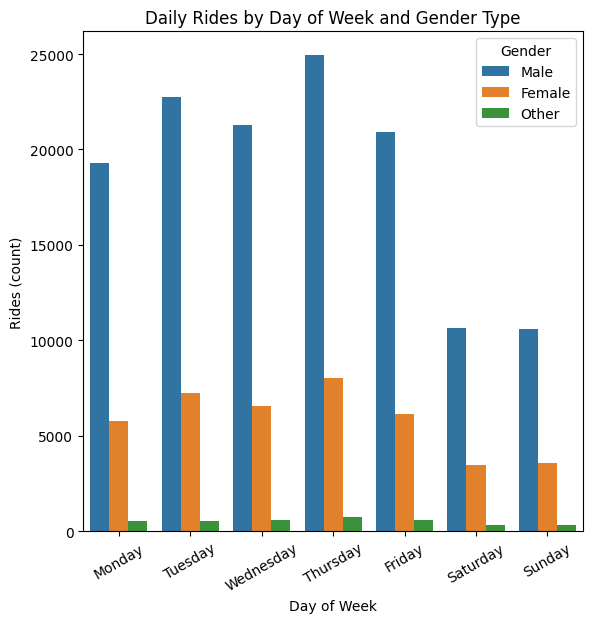

In [4]:
# Generate clustered bar chart of daily rides vs day of week and gender type
fig = plt.figure(figsize = (5, 5))
ax = fig.add_axes((1, 1, 1, 1));
ax = sns.countplot(data = expl_plot_df, x = 'day_of_week', hue = 'member_gender')
plt.xticks(rotation = 30)
plt.xlabel('Day of Week')
plt.ylabel('Rides (count)')
plt.legend(title = 'Gender')
plt.title('Daily Rides by Day of Week and Gender Type');

# Although males make up a larger proportion of daily rides, 
# each gender appears to have the same day of week riding behavior.
# Daily rides peak on Thursday and are at a minimum on weekends.

## Rides by Day of Week and Start Time

***When are the peak times for GoBikes use? What time of day are GoBikes most often used?***

*   Weekday ride start time distributions are different than weekend ride start time distributions
*   Weekday rides start at typical commute times for the workday (8-9am and 5-6pm)
*   Weekend rides start later and more uniformly throughout the day with similar density between 11am-5pm

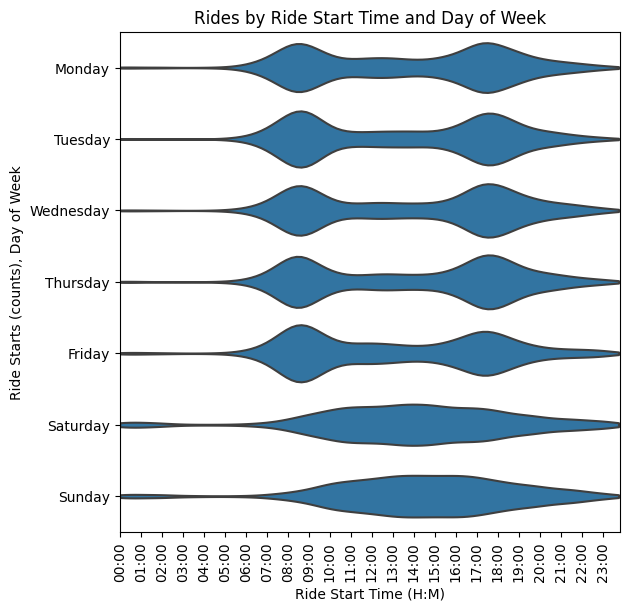

In [5]:
# Create Violin Plot of Ride Start Time vs Day of Week
fig = plt.figure(figsize = (5, 5))
ax = fig.add_axes((1, 1, 1, 1));
ax = sns.violinplot(data = expl_plot_df, x = 'interval', y = 'day_of_week', inner = None, cut = 0, color = 'tab:blue')
ax.set_xticks(np.arange(0, 96, 4), ['00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00',
                                   '07:00', '08:00', '09:00', '10:00', '11:00', '12:00',
                                   '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', 
                                    '19:00', '20:00', '21:00', '22:00', '23:00'])
ax.set_xlim(left = 0, right = 95.25)
plt.xticks(rotation = 90)
plt.xlabel('Ride Start Time (H:M)')
plt.ylabel('Ride Starts (counts), Day of Week')
plt.title('Rides by Ride Start Time and Day of Week');

# The weekday ride start time distribution is different than the weekend ride start time distribution.
# Weekday rides appear to start at typical commute times for the workday.
# Weekend rides appear to start later and more uniformly throughout the day.

## Ride Duration by Day of Week (weekday vs weekend) and Start Time

***Does ride duration vary by day of week? When do users take the longest rides?***

*   The longest rides start during the middle of the day (10am - 4pm)
*   The longest rides on weekends (200+ minutes) are longer than the longest rides on weekdays (100 minutes)
*   Rides on weekdays typically last between 2 - 20 minutes
*   Rides on weekends typically last between 2 - 30 minutes

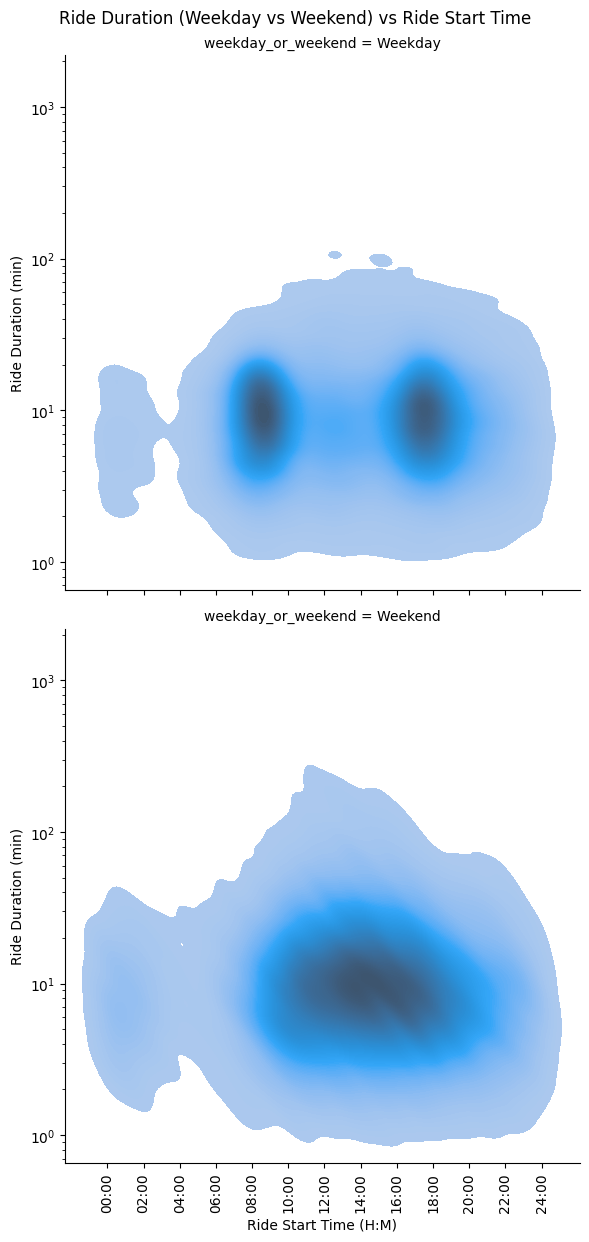

In [6]:
# Create FacetGrid of Ride Start Time vs Duration vs Weekday or Weekend
# Set x ticks
xt = np.arange(0, 97, 8)

# Plot data
g = sns.FacetGrid(data = expl_plot_df, row = 'weekday_or_weekend', height = 6, aspect = 1)
g.map_dataframe(sns.kdeplot, x = 'interval', y = 'duration_min',
                log_scale = (False, True), levels = 100, thresh = 0.01, fill = True)
g.set_axis_labels('Ride Start Time (H:M)', 'Ride Duration (min)')
g.set(xticks = xt)
g.set_xticklabels(['00:00', '02:00', '04:00', '06:00', '08:00', '10:00', '12:00', '14:00', '16:00', '18:00', '20:00', '22:00', '24:00'], rotation = 90)
plt.suptitle('Ride Duration (Weekday vs Weekend) vs Ride Start Time', y = 1.01);